# Analise do dados do Nome bebês americanos 1880 a 2010

In [21]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Mostrando as 10 primeira linha do yob1880.txt
!head -n 10 datasets/babynames/yob1880.txt

In [3]:
# Mostrando os dados do yob1880.txt usando pandas
names1880 = pd.read_csv('datasets/babynames/yob1880.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [4]:
# Soma da coluna de nascimentos por sexo como o número total de nascimentos neste ano
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [5]:
# Reunir todos os dados em um único DataFrame
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

In [6]:
# Concatena tudo em um único DataFrame
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [7]:
# Agregá-los em níveis de ano e sexo usando groupby ou pivot_table
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

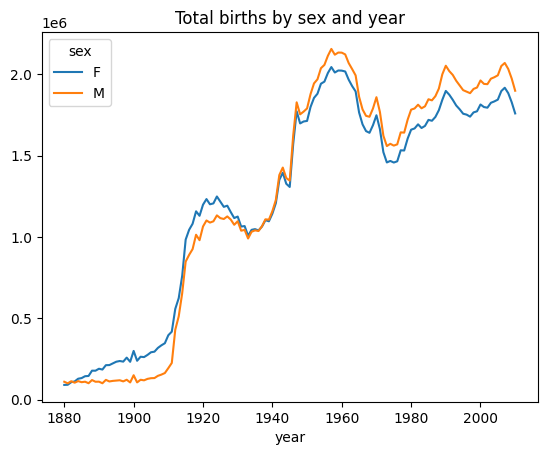

In [8]:
# Plotagem do gráfico
total_births.plot(title='Total births by sex and year')

In [9]:
# Agrupar os dados por ano e por sexo e então adicionar a nova coluna em cada grupo com a probabilidade ou proporção

def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group
names = names.groupby(["year", "sex"], as_index=False).apply(add_prop)

names

name sex  births  year      prop
0   0             Mary   F    7065  1880  0.077643
    1             Anna   F    2604  1880  0.028618
    2             Emma   F    2003  1880  0.022013
    3        Elizabeth   F    1939  1880  0.021309
    4           Minnie   F    1746  1880  0.019188
...                ...  ..     ...   ...       ...
261 1690779    Zymaire   M       5  2010  0.000003
    1690780     Zyonne   M       5  2010  0.000003
    1690781  Zyquarius   M       5  2010  0.000003
    1690782      Zyran   M       5  2010  0.000003
    1690783      Zzyzx   M       5  2010  0.000003

[1690784 rows x 5 columns]

In [11]:
# Verificando se a coluna prop tem a soma igual a 1 em todos os grupos
names.groupby(["year", "sex"])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [12]:
# Os primeiros 1000 nomes para cada combinação de sexo/ano
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])

top1000 = grouped.apply(get_top1000)
top1000.head()

name sex  births  year      prop
year sex                                           
1880 F   0 0       Mary   F    7065  1880  0.077643
           1       Anna   F    2604  1880  0.028618
           2       Emma   F    2003  1880  0.022013
           3  Elizabeth   F    1939  1880  0.021309
           4     Minnie   F    1746  1880  0.019188

In [13]:
# Descarta o índice de grupo, que não será necessário
top1000 = top1000.reset_index(drop=True)
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [14]:
# Outra forma de estar fazendo
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [15]:
# Foi criada a mesma tabela de cima
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [16]:
# Analisando tendência para os nomes
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [17]:
# Tabela pivô com o número total de nascimentos por ano e por nome
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [18]:
# Agora esses dados podem ser plotados para uma porção de nomes com o método plot de DataFrame
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

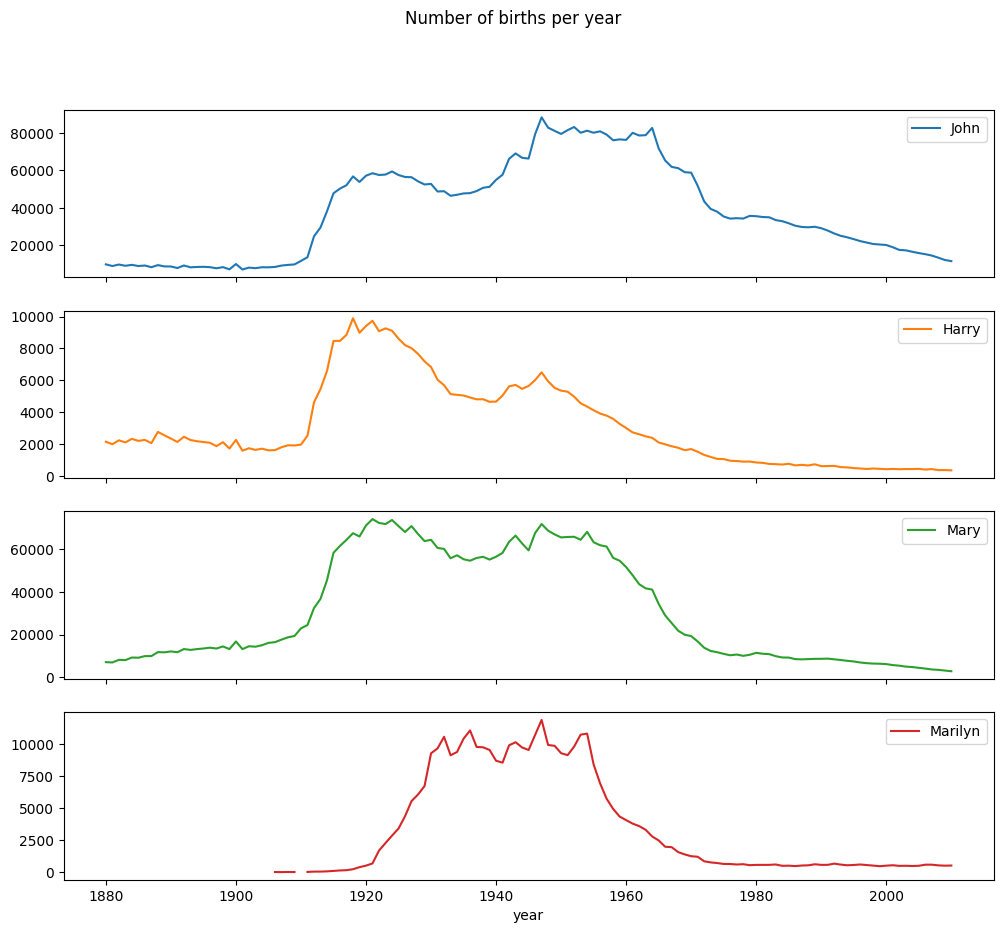

In [19]:
# Plotagem do gráfico
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

subset.plot(subplots=True, figsize=(12, 10), grid=False, title='Number of births per year')

In [22]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [23]:
# Proporção de nascimentos representada pelos 1000 nomes mais populares, para os quais fiz uma agregação 
# e plotei por ano e sexo
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

<Axes: title={'center': 'Sum of table1000.prop by year and sex'}, xlabel='year'>

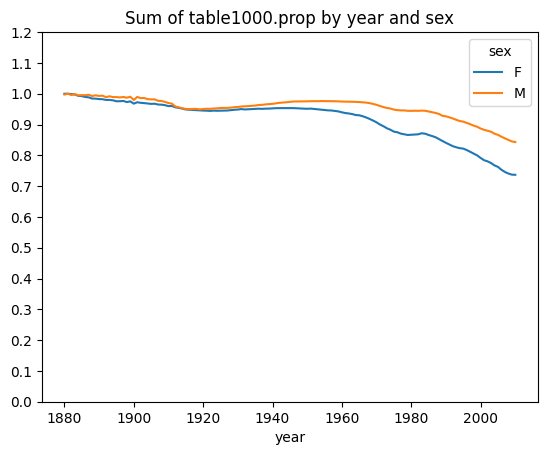

In [27]:
# Proporção de nascimento representada no 1000 primeiros nomes, por sexo
table.plot(title="Sum of table1000.prop by year and sex", yticks=np.linspace(0, 1.2, 13))

In [28]:
# Nomes de menino em 2010
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [29]:
# Ordenar o prop e obter a soma cumulativa
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [30]:
# Para alcançar a 50%, usa o método searchsorted para devolver a posição na soma cumulativa em que 0.5
prop_cumsum.searchsorted(0.5)

116

In [31]:
# Comparação no ano de 1900
df = boys[boys.year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

25

In [32]:
# Combinação de ano/sexo
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()

In [33]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [34]:
# Duas series temporais, uma para cada sexo, indexada por ano
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

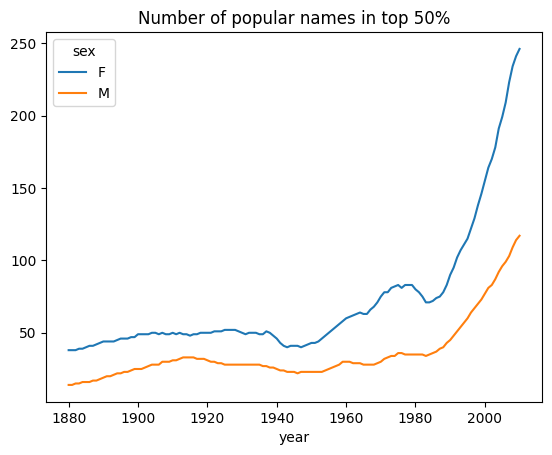

In [35]:
# Os nomes de menina têm sido sempre mais diversificado que os nomes de meninos
diversity.plot(title='Number of popular names in top 50%')

In [36]:
# Extrai a última letra da coluna de nomes
def get_last_letter(x):
    return x[-1]

last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"

table = names.pivot_table("births", index=last_letters, columns=["sex", "year"], aggfunc=sum)

In [37]:
# Os 3 anos representativos da história e exibir as primeiras linhas
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [38]:
# A soma de cada ano e sex
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [39]:
# Proporção do total de nascimentos para cada sexo
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

<Axes: title={'center': 'Female'}, xlabel='last_letter'>

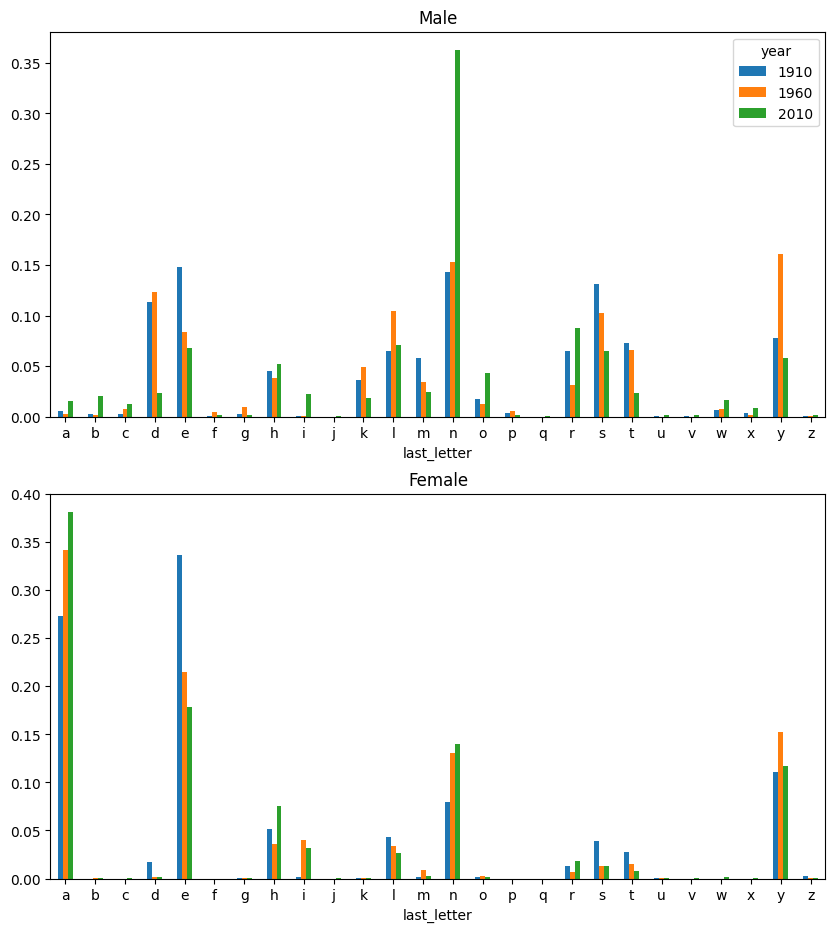

In [42]:
# Plotagens de barras para cada sexo, separadas por ano
# Proporção de nomes de meninos e de meninas que terminam com cada letra
fig, axes = plt.subplots(2, 1, figsize=(10, 11))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female", legend=False)

In [43]:
plt.subplots_adjust(hspace=0.25)

<Figure size 640x480 with 0 Axes>

In [44]:
# Normalizar por ano e por sexo e selecionar um subconjunto de letras para nomes de meninos, 
# farei a transposição para cada coluna seja uma série temporal
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


In [45]:
plt.close("all")

In [46]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='year'>

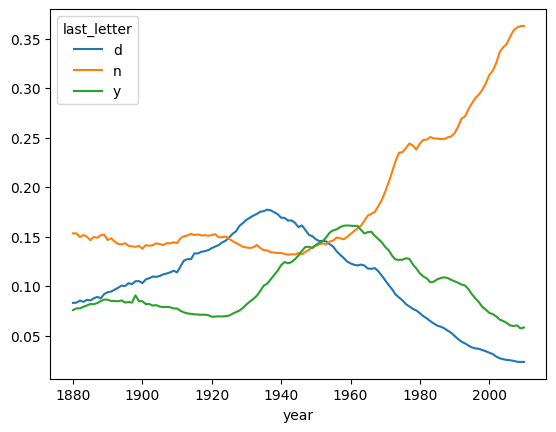

In [47]:
# Proporção de meninos nascidos cujos nomes terminam com d, n e y no tempo
dny_ts.plot()

In [48]:
# Observar os nomes de meninos que eram populares para um sexo antes da amostra, mas "mudaram de sexo" atualmente
all_names = pd.Series(top1000["name"].unique())
lesley_like = all_names[all_names.str.contains("Lesl")]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [49]:
# Filtrar para ter somente esses nomes e somar os nascimentos agrupados por nome a fim de ver as frequência relativas
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["births"].sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [50]:
# Agregar por sexo e por ano, e normalizar no ano
table = filtered.pivot_table("births", index="year",
                             columns="sex", aggfunc="sum")
table = table.div(table.sum(axis="columns"), axis="index")
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


In [51]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='year'>

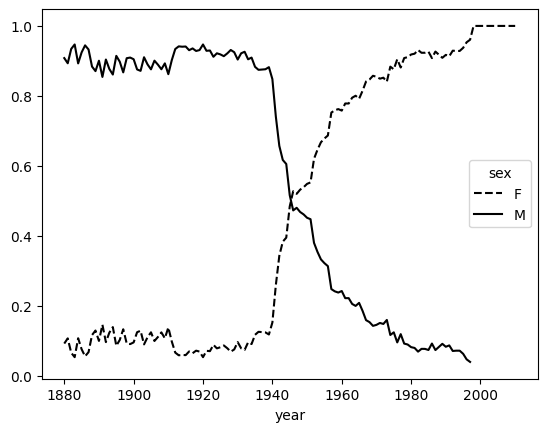

In [52]:
# Proporção de nomes masculinos/femininos semelhantes a Lesley no tempo
table.plot(style={"M": "k-", "F": "k--"})